<a href="https://colab.research.google.com/github/mbashirbaltistan/mbashirbaltistan/blob/main/google%20colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
data = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
(X_train, y_train), (X_test, y_test) = data


In [3]:
X_train.shape

(60000, 28, 28)

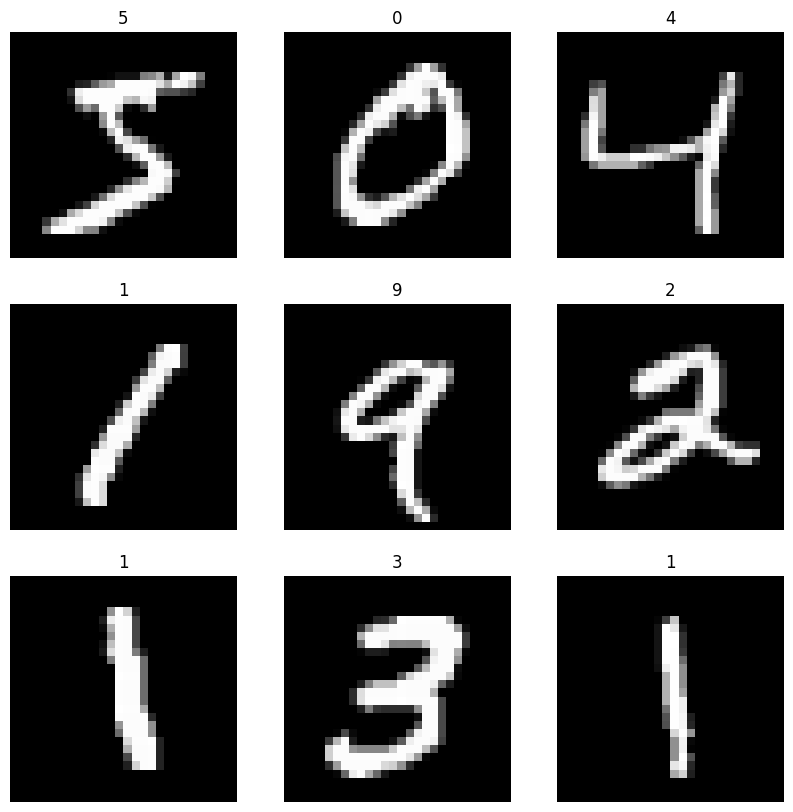

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
 ax = plt.subplot(3, 3, i + 1)
 plt.imshow(X_train[i], cmap='gray')
 plt.title(y_train[i])
 plt.axis('off')
plt.show()


In [5]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')


In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
from keras import utils
print(y_test.shape)
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]


(10000,)


In [8]:
print(y_test.shape)


(10000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense


In [10]:
model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, epochs= 10, batch_size = 100)


Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.4197 - accuracy: 0.8821
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1932 - accuracy: 0.9439
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1504 - accuracy: 0.9560
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1238 - accuracy: 0.9632
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1071 - accuracy: 0.9676
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0938 - accuracy: 0.9720
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0856 - accuracy: 0.9742
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0778 - accuracy: 0.9765
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0686 - accuracy: 0.9791
Epoch 10/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0644 - accuracy: 0.9801

In [14]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)


313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9686
Accuracy:  96.85999751091003
